# Exercise 1a

Group Members: Luis Pazos Clemens, Robert Freund, Eugen Dizer

Deadline: 20.11.2020, 16:00.

In [1]:
#Load standard libraries
import numpy as np   
import matplotlib.pyplot as plt   
%matplotlib inline

# 1 Monte-Carlo Simulation

In the lecture, we considered the following toy problem: The feature variable $X \in [0, 1]$ is real-valued
and 1-dimensional, and the response $Y \in \{0, 1\}$ is discrete with two classes. The prior probabilities
and likelihoods are given by
\begin{align*}
p(Y = 0) = p(Y &= 1) = \frac{1}{2} \,, \\
p(X = x \vert Y = 0) &= 2 − 2x \,, \\
p(X = x \vert Y = 1) &= 2x \,.
\end{align*}

We also derived theoretical error rates of the Bayes and nearest neighbor classifiers for this problem. Monte Carlo simulation is a powerful method to verify the correctness of theoretical results
experimentally.

## 1.1 Data Creation and Visualization (7 points)

Since the given model is generative, one can create data using a random number generator. Specifically, one first samples an instance label $Y$ according to the prior probabilities, and then uses the
corresponding likelihood to sample the feature $X$. If no predefined random generator for the desired
likelihood is available (as is the case here), uniformly distributed samples from a standard random
number generator can be transformed to the desired distribution by means of "inverse transform
sampling" (see https://en.wikipedia.org/wiki/Inverse_transform_sampling).

Work out the required transformation formulas for our likelihoods and show your derivation in a
Markdown cell. Then implement a function that returns the $X$-values and corresponding $Y$-labels for $N$ data instances. Use the module
numpy.random to generate random numbers. Check that the data have the correct distribution
with matplotlib (see https://matplotlib.org/gallery/statistics/hist.html for a demo).

### Derivation:

We have the given likelihoods: $p(X=x \vert Y=0) = 2 - 2x$ and $p(X=x \vert Y=1) = 2x$. 

From these we can construct the cumulative distribution functions by integration:
\begin{align*}
F_x(Y = 0) &= 2x - x^2 \,, \\ 
F_x(Y = 1) &= x^2 \,.
\end{align*}

Inverting those functions, one gets the distribution for $X$:
\begin{align*}
X(Y = 0) &= F^{-1}_x(Y = 0) = 1 - \sqrt{1-u} \,, \\ 
X(Y = 1) &= F^{-1}_x(Y = 1) = \sqrt{u} \,,
\end{align*}
where $u \in [0,1]$ is a random variable. 

In [2]:
def create_data(N):
    # Create N uniformly distributed random numbers
    U = np.random.rand(N)
    
    # Get the X variables with the respective distribution
    X0 = 1 - np.sqrt(1-U)
    X1 = np.sqrt(U)
    
    # Create N random numbers 0 or 1 with probability 0.5
    Y = np.random.rand(N)
    Y[Y < 0.5] = 0
    Y[Y >= 0.5] = 1
    
    # Pick a random X0 when Y=0
    # Pick a random X1 when Y=1
    X = X0
    X[Y == 1] = X1[Y == 1]

    return [X, Y]

The distribution can be visualized with histograms:

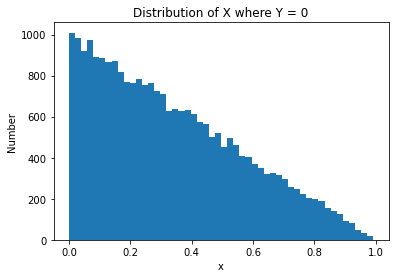

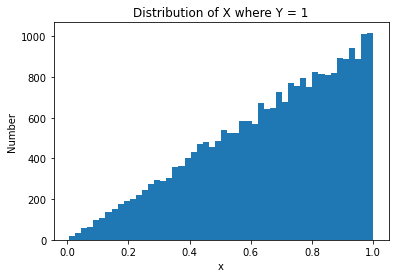

In [13]:
N = 50000

data = create_data(N)

# X values where Y = 0
X0 = data[0][data[1] == 0]

# X values where Y = 1
X1 = data[0][data[1] == 1]

plt.title("Distribution of X where Y = 0")
plt.hist(X0, bins=50)
plt.ylabel('Number')
plt.xlabel('x')
plt.show()

plt.title("Distribution of X where Y = 1")
plt.hist(X1, bins=50)
plt.ylabel('Number')
plt.xlabel('x')
plt.show()

## 1.2 Classification by Thresholding

In the lecture, we defined a classification rule deciding according to a threshold $x_t \in [0, 1]$:

- Rule A  (threshold classifier): $Y = f_A(X;x_t) = 0$ if $X < x_t$ and $Y = f_A(X;x_t) = 1$ if $X \geq x_t$
- Rule B  (threshold anti-classifier): $Y = f_B(X;x_t) = 1$ if $X < x_t$ and $Y = f_B(X;x_t) = 0$ if $X \geq x_t$

The corresponding error rates are:
\begin{align*}
p(\text{error}|A; x_t) &= \frac{1}{4} + \left(x_t - \frac{1}{2}\right)^2 \\
p(\text{error}|B; x_t) &= \frac{3}{4} - \left(x_t - \frac{1}{2}\right)^2 = 1 - p(\text{error}|A; x_t)
\end{align*}

Confirm experimentally for $x_t \in \{0.2, 0.5, 0.6\}$ that the predicted error rates are correct: Verify
that the minimum overall error of 25% is achieved when the threshold $x_t = 0.5$ (optimal Bayes
classifier). Repeat each test with 10 different test datasets of the same size $M$ and compute mean
and standard deviation of the error. Use test set sizes $M \in \{10, 100, 1000, 10000\}$. How does the
error standard deviation decrease with increasing $M$?

## 1.3  Baseline Classifiers

We now compare the above results to two rules that entirely ignore the features:

- Rule C (guessing): $Y = f_C(X) = 0,1$ with probability 1/2
- Rule D (constant): $Y = f_D(X) = 1$ (it always predicts class 1)

Both result in an error rate of 1/2. Confirm this like in the previous exercise: Plot the error and its
standard deviation as a function of test set sizes $M \in \{10, 100, 1000, 10000\}$ for both new rules.